<a href="https://colab.research.google.com/github/katuhangugi/Data_analysis-/blob/main/Harmful%20Substance%20Content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           日期  质量等级  AQI指数  PM2.5  PM10  So2  No2    Co  O3
0  2013-10-28  轻度污染    131     99   134   23   50  1.05  59
1  2013-10-29     良     71     52    57    7   40  0.96  65
2  2013-10-30     优     38     25    32    8   29  0.85  44
3  2013-10-31     优     43     29    41   11   28  1.19  20
4  2013-11-01     优     50     34    48   13   26  1.51  26


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


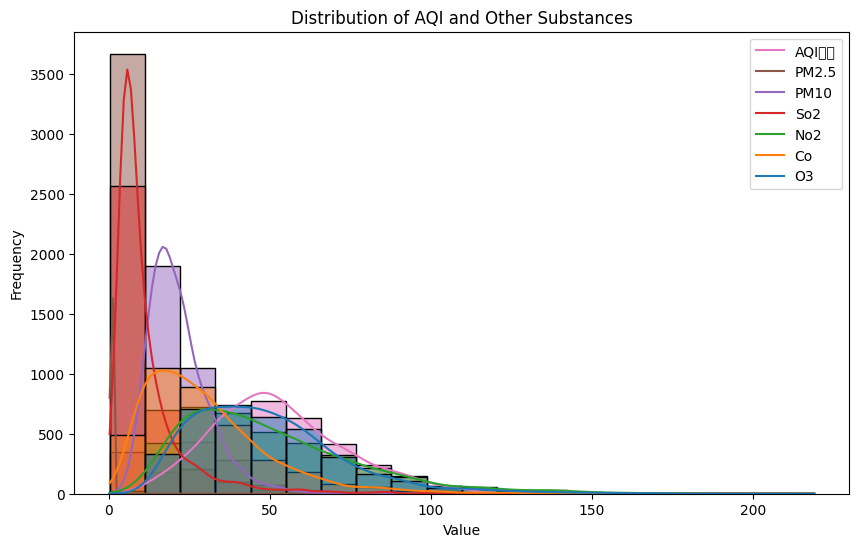

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "//content//GY_weather.xls"
data = pd.read_excel(dataset_path)

# Display the first few rows of the dataset
print(data.head())

# Visualize AQI distribution
plt.figure(figsize=(10, 6))
columns_to_plot = ['AQI指数', 'PM2.5', 'PM10', 'So2', 'No2', 'Co', 'O3']

# Check if all columns in columns_to_plot exist in the DataFrame
missing_columns = [col for col in columns_to_plot if col not in data.columns]
if missing_columns:
    print(f"The following columns are missing in the DataFrame: {missing_columns}")
else:
    sns.histplot(data[columns_to_plot], bins=20, kde=True)
    plt.title('Distribution of AQI and Other Substances')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(columns_to_plot)
    plt.show()


<ipython-input-34-7fea440579ba>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_content = data.groupby(data['日期'].dt.year).mean()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


          AQI指数      PM2.5       PM10        So2        No2        Co  \
日期                                                                      
2013  90.815385  65.923077  88.923077  41.461538  35.846154  0.933846   
2014  66.836565  45.110803  68.221607  21.584488  27.011080  0.766039   
2015  57.627397  37.035616  58.260274  15.764384  25.287671  0.697205   
2016  57.571038  34.505464  60.904372  12.371585  25.923497  0.708962   
2017  51.704918  31.046448  51.994536  11.505464  24.273224  0.709290   
2018  51.414085  30.467606  52.994366   9.216901  21.763380  0.609944   
2019  46.099099  27.279279  47.132132   9.183183  20.036036  0.641381   
2020  39.713115  22.748634  40.836066   9.360656  17.519126  0.658962   
2021  40.575342  23.073973  42.556164   9.304110  19.638356  0.612027   
2022  34.893151  20.580822  34.101370   6.232877  15.323288  0.515644   
2023  38.971831  23.383099  37.805634   6.532394  16.625352  0.525577   
2024  43.571429  29.000000  42.142857   9.285714  1

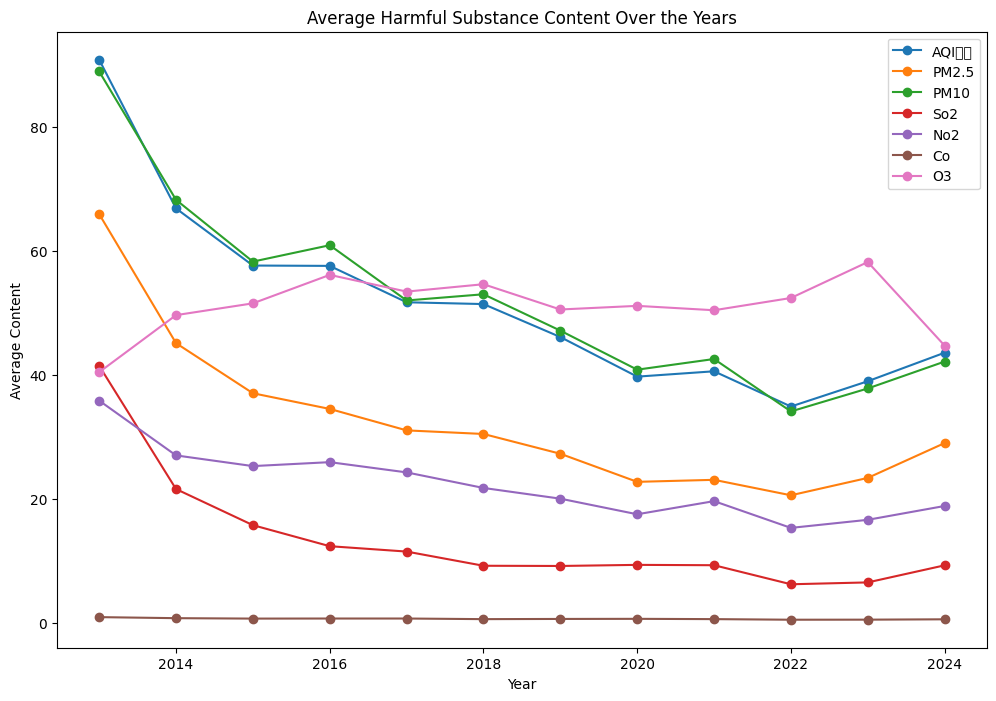

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "//content//GY_weather.xls"
data = pd.read_excel(dataset_path)

# Convert '日期' column to datetime format
data['日期'] = pd.to_datetime(data['日期'])

# Check if '质量等级' column exists before dropping it
if '质量等级' in data.columns:
    # Drop the '质量等级' column
    data = data.drop(columns=['质量等级'])
else:
    print("'质量等级' column not found in the DataFrame.")

# Group data by year and calculate the average harmful substance content
average_content = data.groupby(data['日期'].dt.year).mean()
# Display average content
print(average_content)
# Visualize average content of specific columns over the years
plt.figure(figsize=(12, 8))
columns_to_plot = ['AQI指数', 'PM2.5', 'PM10', 'So2', 'No2', 'Co', 'O3']
for column in columns_to_plot:
    plt.plot(average_content.index, average_content[column], marker='o', label=column)

plt.title('Average Harmful Substance Content Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Content')
plt.legend(loc='upper right')
plt.show()


In [6]:
import numpy as np
import pandas as pd

class ID3DecisionTree:
    def __init__(self):
        self.tree = None

    def entropy(self, column):
        _, counts = np.unique(column, return_counts=True)
        probabilities = counts / counts.sum()
        return -sum(probabilities * np.log2(probabilities))

    def information_gain(self, data, split_attribute_name, target_name):
        total_entropy = self.entropy(data[target_name])
        values, counts = np.unique(data[split_attribute_name], return_counts=True)
        weighted_entropy = sum(counts / len(data) * self.entropy(data.where(data[split_attribute_name] == value).dropna()[target_name]) for value, count in zip(values, counts))
        information_gain = total_entropy - weighted_entropy
        return information_gain

    def gain_ratio(self, data, split_attribute_name, target_name):
        info_gain = self.information_gain(data, split_attribute_name, target_name)
        split_entropy = self.entropy(data[split_attribute_name])
        if split_entropy == 0:
            return 0
        return info_gain / split_entropy

    def choose_best_attribute(self, data, target_name):
        features = data.columns.drop(target_name)
        best_gain = -1
        best_attribute = None
        for feature in features:
            gain = self.information_gain(data, feature, target_name)
            if gain > best_gain:
                best_gain = gain
                best_attribute = feature
        return best_attribute

    def choose_best_attribute_gain_ratio(self, data, target_name):
        features = data.columns.drop(target_name)
        best_gain_ratio = -1
        best_attribute = None
        for feature in features:
            gain_ratio = self.gain_ratio(data, feature, target_name)
            if gain_ratio > best_gain_ratio:
                best_gain_ratio = gain_ratio
                best_attribute = feature
        return best_attribute

    def build_tree(self, data, target_name, criterion='gain'):
        unique_targets = np.unique(data[target_name])
        if len(unique_targets) == 1:
            return unique_targets[0]

        if criterion == 'gain':
            best_attribute = self.choose_best_attribute(data, target_name)
        elif criterion == 'gain_ratio':
            best_attribute = self.choose_best_attribute_gain_ratio(data, target_name)

        tree = {best_attribute: {}}
        remaining_attributes = data.columns.drop([target_name, best_attribute])
        for value in np.unique(data[best_attribute]):
            subset = data[data[best_attribute] == value].drop(columns=best_attribute)
            subtree = self.build_tree(subset, target_name, criterion)
            tree[best_attribute][value] = subtree
        return tree

    def fit(self, X, y, criterion='gain'):
        data = pd.concat([X, y], axis=1)
        target_name = y.columns[0]
        self.tree = self.build_tree(data, target_name, criterion)

    def predict_instance(self, instance):
        tree = self.tree
        while isinstance(tree, dict):
            root = next(iter(tree))
            value = instance[root]
            tree = tree[root][value]
        return tree

    def predict(self, X):
        return pd.DataFrame(X.apply(self.predict_instance, axis=1))


R-squared score for column 'AQI指数': 0.9744916039015008
R-squared score for column 'PM25': 0.9396609291396064
R-squared score for column 'PM10': 0.9245330624278545
R-squared score for column 'So2': 0.42944886022662443
R-squared score for column 'No2': 0.4889304164696626
R-squared score for column 'Co': 0.36225874385772905
R-squared score for column 'O3': 0.14311123711474738


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


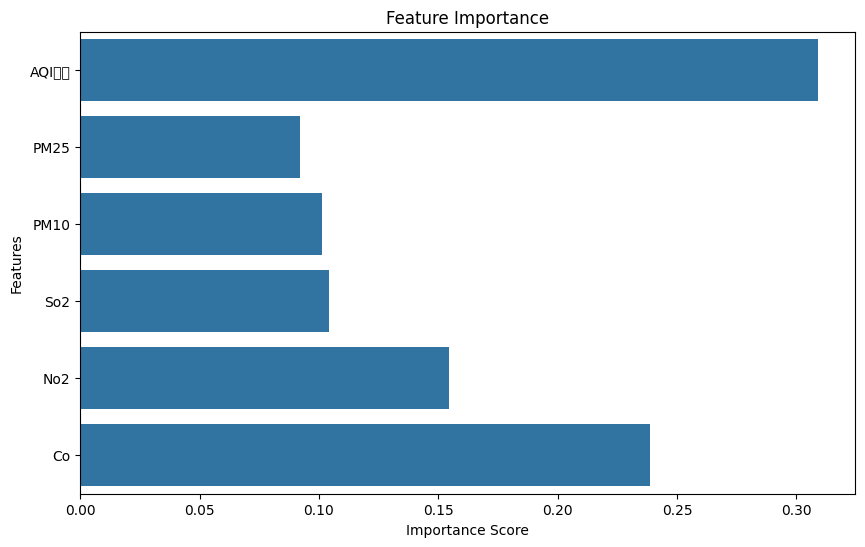

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Create empty dictionary to store models and their accuracies
models = {}

# Iterate over each column (excluding the '日期' column)
for column in data.columns.drop('日期'):
    # Assuming the current column as the target variable and other columns as features
    X = data.drop(columns=['日期', column])
    y = data[column]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize DecisionTreeRegressor with criterion as 'mse' (mean squared error)
    model = DecisionTreeRegressor()

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    print(f"R-squared score for column '{column}': {r2}")

    # Store the trained model and its accuracy
    models[column] = {'model': model, 'r2_score': r2}
# Assuming '质量等级' as the target variable and other columns as features
feature_importance = model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers: [[ 30.38101604  53.34090909  52.98128342   7.93983957  19.40374332
    0.57385027  79.05882353]
 [ 13.9732659   26.19364162  28.18063584   6.07225434  15.37644509
    0.55726879  44.93786127]
 [ 54.63063063  86.7963964   78.6036036   20.78738739  31.3981982
    0.78340541  55.67927928]
 [ 31.45243619  51.01740139  50.54988399  12.19257541  24.10092807
    0.71429234  40.36078886]
 [ 93.73333333 132.03333333 125.44166667  53.34166667  44.1
    1.11116667  48.775     ]]
Labels: [4 2 1 ... 3 2 1]


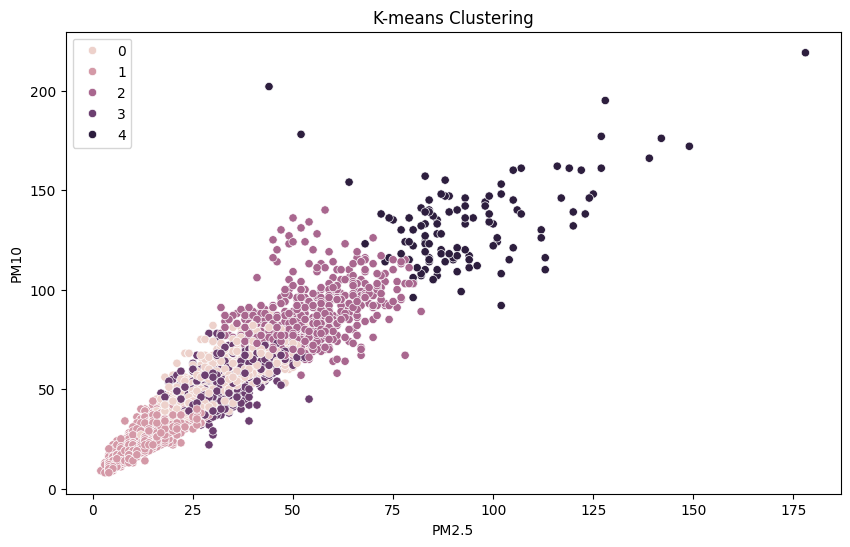

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'PM2.5' and 'PM10' columns for K-means clustering
X_kmeans = data[['PM2.5', 'PM10', 'AQI指数', 'So2',  'No2', 'Co', 'O3']]

# Initialize KMeans with random initialization
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(X_kmeans)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get labels
labels = kmeans.labels_

# Display cluster centers and labels
print("Cluster Centers:", cluster_centers)
print("Labels:", labels)

# Visualize K-means clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5', y='PM10', hue=labels, data=data)  # Corrected column names here
plt.title('K-means Clustering')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()


Accuracy: 0.20516717325227962


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


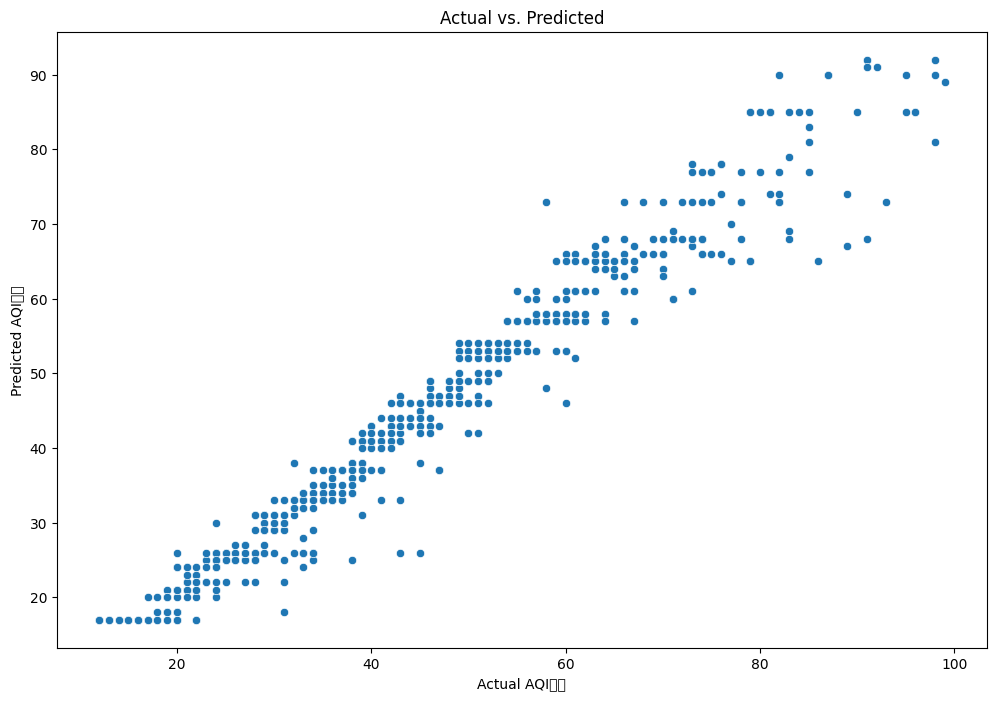

In [27]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("ModelTraining") \
    .getOrCreate()

# Assuming 'data' is a pandas DataFrame
# Convert pandas DataFrame to Spark DataFrame
spark_data = spark.createDataFrame(data)

# Filter out rows where AQI指数 values are outside the range [0, 100]
spark_data = spark_data.filter((spark_data['AQI指数'] >= 0) & (spark_data['AQI指数'] < 100))

# Define the feature columns (excluding 'AQI指数' column)
feature_cols = ['PM25', 'PM10', 'So2', 'No2', 'Co', 'O3']

# Create a VectorAssembler to combine the feature columns into a single feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
spark_data = assembler.transform(spark_data)

# Split data into training and testing sets
train_data, test_data = spark_data.randomSplit([0.8, 0.2], seed=42)

# Train a model (e.g., RandomForestClassifier)
rf = RandomForestClassifier(featuresCol="features", labelCol="AQI指数", numTrees=10)  # Assuming numTrees as 10
model = rf.fit(train_data)

# Evaluate the model
predictions = model.transform(test_data)

# Calculate accuracy or other metrics
evaluator = MulticlassClassificationEvaluator(labelCol="AQI指数", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Convert Spark DataFrame to Pandas DataFrame for visualization
predictions_pd = predictions.select("AQI指数", "prediction").toPandas()

# Visualize actual vs. predicted
plt.figure(figsize=(12, 8))
sns.scatterplot(x='AQI指数', y='prediction', data=predictions_pd)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual AQI指数')
plt.ylabel('Predicted AQI指数')
plt.show()

# Stop SparkSession
spark.stop()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Assume you have features X and target y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Before optimization
# Train a decision tree classifier
dt_classifier_before = DecisionTreeClassifier()
dt_classifier_before.fit(X_train, y_train)

# Predict on test data
y_pred_before = dt_classifier_before.predict(X_test)

# Calculate accuracy before optimization
accuracy_before = accuracy_score(y_test, y_pred_before)
print("Accuracy before optimization:", accuracy_before)

# After optimization
# Preprocess data if needed (e.g., scale features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a random forest classifier
rf_classifier_after = RandomForestClassifier()
rf_classifier_after.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_after = rf_classifier_after.predict(X_test_scaled)

# Calculate accuracy after optimization
accuracy_after = accuracy_score(y_test, y_pred_after)
print("Accuracy after optimization:", accuracy_after)

# Compare performance metrics
if accuracy_after > accuracy_before:
    print("Optimization improved performance.")
elif accuracy_after < accuracy_before:
    print("Optimization degraded performance.")
else:
    print("Optimization did not affect performance.")


Accuracy before optimization: 0.02316076294277929
Accuracy after optimization: 0.027247956403269755
Optimization improved performance.


质量等级 data contains missing or infinite values. Skipping forecast.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecast for the next five days (AQI指数):
3669    38.741759
3670    41.229680
3671    42.467641
3672    45.652347
3673    46.402472
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecast for the next five days (PM2.5):
3669    26.758895
3670    28.186261
3671    28.542101
3672    31.044911
3673    31.903199
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecast for the next five days (PM10):
3669    35.382619
3670    38.484343
3671    40.007241
3672    43.472201
3673    44.912381
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecast for the next five days (So2):
3669    8.698012
3670    9.428753
3671    9.655128
3672    9.775188
3673    9.759678
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecast for the next five days (No2):
3669    19.656284
3670    19.394005
3671    19.848077
3672    20.109012
3673    19.939038
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecast for the next five days (Co):
3669    0.596064
3670    0.567594
3671    0.556607
3672    0.565127
3673    0.567918
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecast for the next five days (O3):
3669    35.216153
3670    40.258366
3671    40.767784
3672    40.270072
3673    40.676835
Name: predicted_mean, dtype: float64


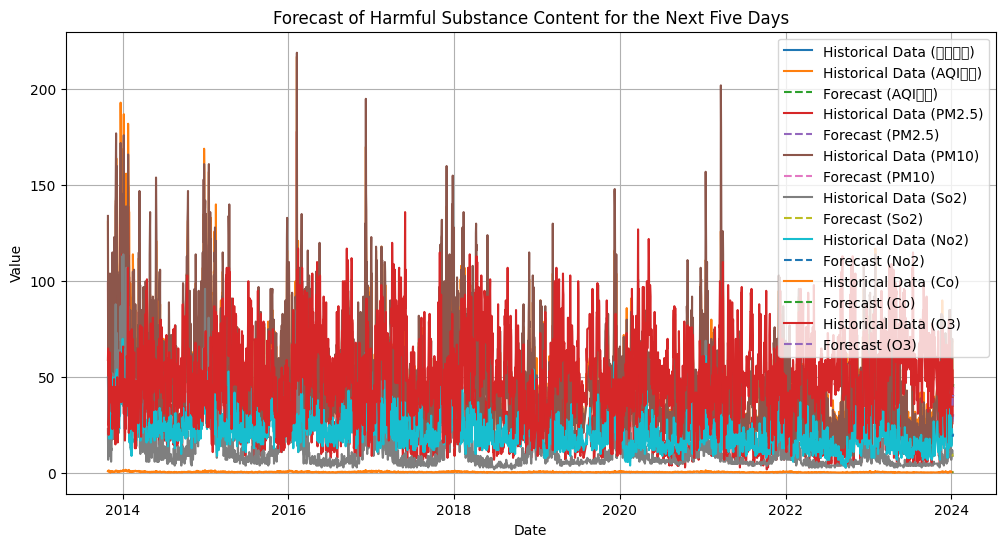

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load the dataset
dataset_path = "//content//GY_weather.xls"
data = pd.read_excel(dataset_path)

# Assuming '日期' column is in datetime format
data['日期'] = pd.to_datetime(data['日期'])

# Set '日期' column as index and specify the frequency
data.set_index('日期', inplace=True)
data.index = pd.DatetimeIndex(data.index.values, freq=data.index.inferred_freq)

# Initialize an empty dictionary to store forecasts for each column
forecasts = {}

# Loop through each column and train ARIMA model
for column in data.columns:
    if column != '日期':  # Skip the date column
        # Convert column to numeric
        data[column] = pd.to_numeric(data[column], errors='coerce')
        data[column].fillna(method='ffill', inplace=True)  # Fill missing values with previous values

        # Check if the data has enough observations
        if len(data[column]) < 5:
            print(f"Not enough observations for {column}. Skipping forecast.")
            continue

        # Check for missing or infinite values in the exogenous variables
        if np.any(~np.isfinite(data[column])):
            print(f"{column} data contains missing or infinite values. Skipping forecast.")
            continue

        # Check for stationarity
        adf_result = adfuller(data[column])
        if adf_result[1] > 0.05:
            print(f"{column} data is not stationary (p-value: {adf_result[1]}). Applying differencing.")
            data[column] = data[column].diff().dropna()

        try:
            # Train ARIMA model
            model = ARIMA(data[column], order=(5,1,0))  # ARIMA(5,1,0) model
            model_fit = model.fit()

            # Forecast the next five days
            forecast = model_fit.forecast(steps=5)

            # Store forecast in the dictionary
            forecasts[column] = {'forecast': forecast, 'dates': pd.date_range(start=data.index[-1], periods=5, freq=data.index.inferred_freq)}

            # Print forecasted values for each column
            print(f"Forecast for the next five days ({column}):")
            print(forecast)

        except Exception as e:
            print(f"Error occurred while fitting ARIMA model for {column}: {e}")
            continue

# Plot time series data and forecasted values for each column
plt.figure(figsize=(12, 6))
for column in data.columns:
    if column != '日期':  # Skip the date column
        plt.plot(data.index, data[column], label=f'Historical Data ({column})')
        if column in forecasts:
            plt.plot(forecasts[column]['dates'], forecasts[column]['forecast'], label=f'Forecast ({column})', linestyle='dashed')

plt.title('Forecast of Harmful Substance Content for the Next Five Days')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
